<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-to-test-Walk-Forward-Optimisation-'with-memory'" data-toc-modified-id="Notebook-to-test-Walk-Forward-Optimisation-'with-memory'-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook to test Walk Forward Optimisation 'with memory'</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Data</a></span></li></ul></li></ul></li><li><span><a href="#WF-optimization-with-memory---2000:2020" data-toc-modified-id="WF-optimization-with-memory---2000:2020-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>WF optimization with memory - 2000:2020</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Heatmaps-with-widgets" data-toc-modified-id="Heatmaps-with-widgets-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Heatmaps with widgets</a></span></li></ul></li><li><span><a href="#See-OOS-performance" data-toc-modified-id="See-OOS-performance-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>See OOS performance</a></span></li><li><span><a href="#Let´s-see-the-performance-of-the-best-possible-combination-(ex-post)" data-toc-modified-id="Let´s-see-the-performance-of-the-best-possible-combination-(ex-post)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Let´s see the performance of the best possible combination (ex-post)</a></span></li></ul></li></ul></div>

# Notebook to test Walk Forward Optimisation 'with memory'

### Imports

In [1]:
# Settings for notebook visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline
from IPython.core.display import HTML
HTML("""<style>.output_png img {display: block;margin-left: auto;margin-right: auto;text-align: center;vertical-align: middle;} </style>""")

In [2]:
# Necessary imports
import os
import numpy as np
import pandas as pd
import matplotlib as plt
from tqdm.auto import tqdm, trange
print("Libraries imported correctly")

Libraries imported correctly


In [3]:
os.chdir("/Users/Sergio/Documents/Master_QF/Thesis/Code/Algorithmic Strategies")
%run Functions.ipynb

### Data

In [4]:
ini_equity_default = 100
commision_default = 2/130000 + 12.5/130000 #0.000111538462, around 0.011..% of the equity

Close  Market_daily_ret
Date                                     
2020-12-24  3703.060059          0.003537
2020-12-28  3735.360107          0.008723
2020-12-29  3727.040039         -0.002227
2020-12-30  3732.040039          0.001342
2020-12-31  3756.070068          0.006439

<AxesSubplot:title={'center':'SP500'}, xlabel='Date'>

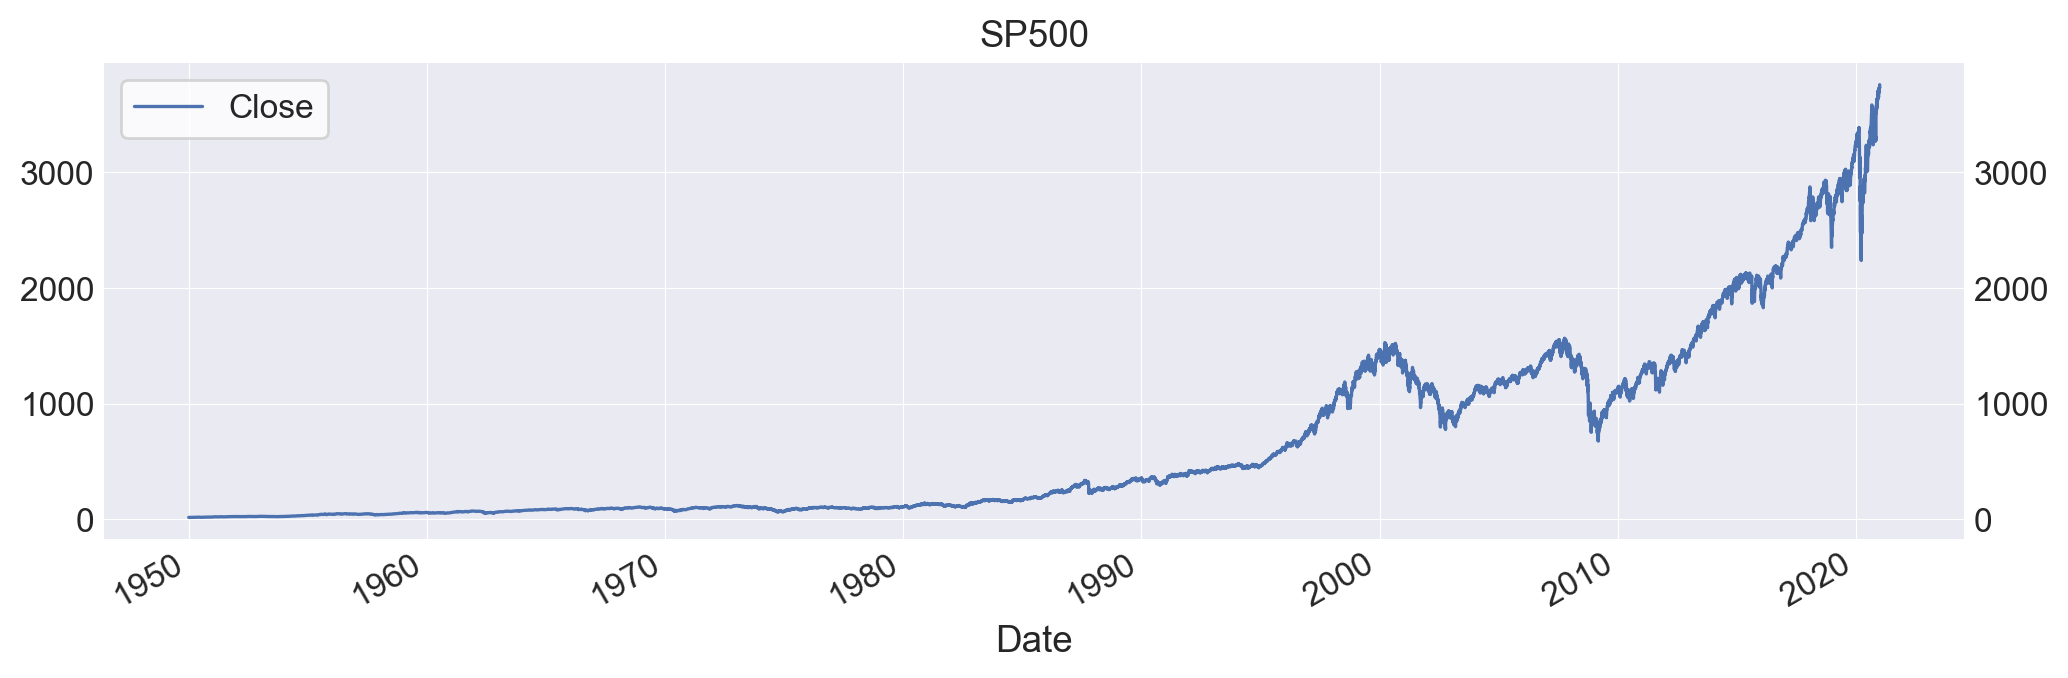

In [5]:
%run Functions.ipynb

#data = get_sp500_data(from_local_file=False, save_to_file=True)
data = get_sp500_data(from_local_file=True, save_to_file=False)
data = data[['Open', 'Close']]

data['Market_daily_ret'] = data['Close'].pct_change().fillna((data['Close']-data['Open'])/data['Open'])
data = data.loc['1950':'2020' ,['Close', 'Market_daily_ret']]

data.tail()
data['Close'].plot(title='SP500', legend=True)

# WF optimization with memory - 2000:2020

In [6]:
%run Functions.ipynb

memory_len = 0

# sell_month_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13]
# sell_duration_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

sell_month_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sell_duration_list = [1, 2, 3, 4, 5, 6, 13, 13, 13, 13, 13, 13]

IS_start = pd.date_range(start='1975-01-01', end='2010-01-01', freq='1YS', closed=None)
IS_end = pd.date_range(start='1984-12-31', end='2019-12-31', freq='1Y', closed=None)
OOS_start = pd.date_range(start='1985-01-01', end='2020-01-01', freq='1YS', closed=None)
OOS_end = pd.date_range(start='1985-12-31', end='2020-12-31', freq='1Y', closed=None)

print(f'Number of combinations: {len(sell_month_list)*len(sell_duration_list)}\n' 
      f'Length of memory (# of IS periods): {memory_len}')
print_periods(IS_start, IS_end, OOS_start, OOS_end)

num_combinations = len(sell_month_list)*len(sell_duration_list)
num_is_years = round((IS_end[0]-IS_start[0]).days/365, 0)
num_oos_years = round((OOS_end[0]-OOS_start[0]).days/365, 0)
info_wf_str = (f'Running {num_combinations} backtests on \n'
               f'\t{len(IS_start)} IS rolling windows of {num_is_years} years\n'
               f'\t{len(OOS_start)} OOS rolling windows of {num_oos_years} years\n'
               f'->Total of {num_combinations*len(IS_start)+len(OOS_start)*2} backtests'
               f'\tMemory of {memory_len} IS periods\n'
              )
num_neighbors_matrix = get_num_neighbors_sell_in_may_and_go_away(sell_month_list, sell_duration_list)
#num_neighbors_matrix

Number of combinations: 144
Length of memory (# of IS periods): 0
Number of periods: 36 : 36     36 : 36
	In SAMPLE		OOS
1975-01-01 : 1984-12-31 	 1985-01-01 : 1985-12-31
1976-01-01 : 1985-12-31 	 1986-01-01 : 1986-12-31
1977-01-01 : 1986-12-31 	 1987-01-01 : 1987-12-31
... ... ... ... ... ... 	 ... ... ... ... ... ...
2009-01-01 : 2018-12-31 	 2019-01-01 : 2019-12-31
2010-01-01 : 2019-12-31 	 2020-01-01 : 2020-12-31


In [7]:
%run Functions.ipynb
hide = True

df_wf = data[IS_start[0]:OOS_end[-1]].copy()
#df_walk_forward = df_walk_forward.loc[:'2020-05-02']

if hide == True:
    # Copy data and create necessary columns 
    new_cols = ['Strat_daily_ret', 'Strat_position', 'Long_only', 'Costs', 'Market_cum_ret']

    df_wf= df_wf.reindex(columns = df_wf.columns.tolist() + new_cols)

    last_position = 0 # We suppose that we start not being invested. 1:long, -1:short

    indiv_ir_list = []
    robust_ir_list = []
    market_ir_list = []

    weights_list = []
    weights_list.append(np.zeros((len(sell_month_list),len(sell_duration_list))))

    cummulated_weights_list = []

    sell_month_best_list = []
    sell_duration_best_list = []

    print(info_wf_str)
    
for i in trange(len(IS_start), desc='Walk Forward loop:'):    
    #if i == 1: break
    
    #print(f'{IS_start[i].year} to {IS_end[i].year}')
    
    is_period = df_wf.loc[IS_start[i]:IS_end[i]].copy()
    oos_period = df_wf.loc[OOS_start[i]:OOS_end[i]].copy()
    
    ############################################ IN SAMPLE  ############################################
    strat_pnl_matrix, strats_ir_matrix, market_pnl, market_ir = run_all_combinations_sell_in_may(is_period, sell_month_list, sell_duration_list, last_position)
    indiv_ir_list.append(strats_ir_matrix)
    market_ir_list.append(market_ir)
    
    # Get the best combination the In-Sample period, or buy_and_hold if it performed better
    best, robust_strats_ir_matrix, IS_weights = get_best_combination_with_memory(strats_ir_matrix, 
                                                                                weights_list, memory_len, 
                                                                                market_ir, num_neighbors_matrix,
                                                                                sell_month_list, sell_duration_list)
        
    robust_ir_list.append(robust_strats_ir_matrix)
    weights_list.append(IS_weights)
    cummulated_weights_list.append(np.sum(weights_list[-(memory_len+1):], axis=0))
    
#    print("\tParams: {} {}" .format(best['param1'], best['param2']))
    sell_month_best_list.append(best['param1'])
    sell_duration_best_list.append(best['param2'])
    
    #print("Best In-sample performance: ")
    if hide == True:
#         print_backtest_stats(is_period, strat_pnl_matrix[best['param1_index'], best['param2_index']], 
#                                strats_ir_matrix[best['param1_index'], best['param2_index']], market_pnl, market_ir,
#                              strat_params=(best['param1'], best['param2']))
#         show_both_heatmaps_new(strats_ir_matrix, robust_strats_ir_matrix, market_ir, plot_title=str(IS_start[i].year)+":"+str(IS_end[i].year), 
#                             x_title="Sell duration", x_values=sell_duration_list, y_title="Sell month", y_values=sell_month_list,
#                               left_plot_title="IR", right_plot_title="Robust IR")
#         plt.show()
#         show_both_heatmaps_new(robust_strats_ir_matrix, 100*IS_weights, market_ir, plot_title=str(IS_start[i].year)+":"+str(IS_end[i].year), 
#                             x_title="Sell duration", x_values=sell_duration_list, y_title="Sell month", y_values=sell_month_list,
#                               left_plot_title="Robust IR", right_plot_title="Weights")
#         plt.show()

#         show_both_heatmaps_new(100*IS_weights, 100*cummulated_weights_list[i], market_ir, plot_title=str(IS_start[i].year)+":"+str(IS_end[i].year), 
#                             x_title="Sell duration", x_values=sell_duration_list, y_title="Sell month", y_values=sell_month_list,
#                               left_plot_title="Weights", right_plot_title="Cumm. Weights")
        
        plt.show()
        hide = True

    ############################################ OUT OF SAMPLE  ############################################
    #print("OOS performance:")
    if hide == True:
        strategy = sell_in_may_and_go_away(oos_period, best['param1'], best['param2'])
        oos_period, last_position, strat_pnl, strat_ir, market_pnl, market_ir = backtest_strat(oos_period, strategy, previous_position=last_position)
        #print_backtest_stats(oos_period, strat_pnl, strat_ir, market_pnl, market_ir, strat_params=(best['param1'], best['param2']))

        # Save come columns from OOS
        df_wf.loc[OOS_start[i]:OOS_end[i], new_cols] = oos_period[new_cols]

#    print()
    
# Delete first element from weights_list (it was initialized to 0)
weights_list = weights_list[1:]

print("End of Walk Forward Optimization")

Running 144 backtests on 
	36 IS rolling windows of 10.0 years
	36 OOS rolling windows of 1.0 years
->Total of 5256 backtests	Memory of 0 IS periods




End of Walk Forward Optimization


1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020
sell_month        9     1     1     9     9     9     7     9     8     8     8     8     8     8     8     7     8     7     6     7     7     7     7     6     5     1     1     6     1     5     5     5     8     8     5     5
sell_duration     2     2     2     2     2     2     4     3     4     4     4     4     4     3     3     3     1     3     4     3     3     3     3     4     5     2     2     4     1     6     2     5     6     6     2     5

<AxesSubplot:ylabel='Frequency'>

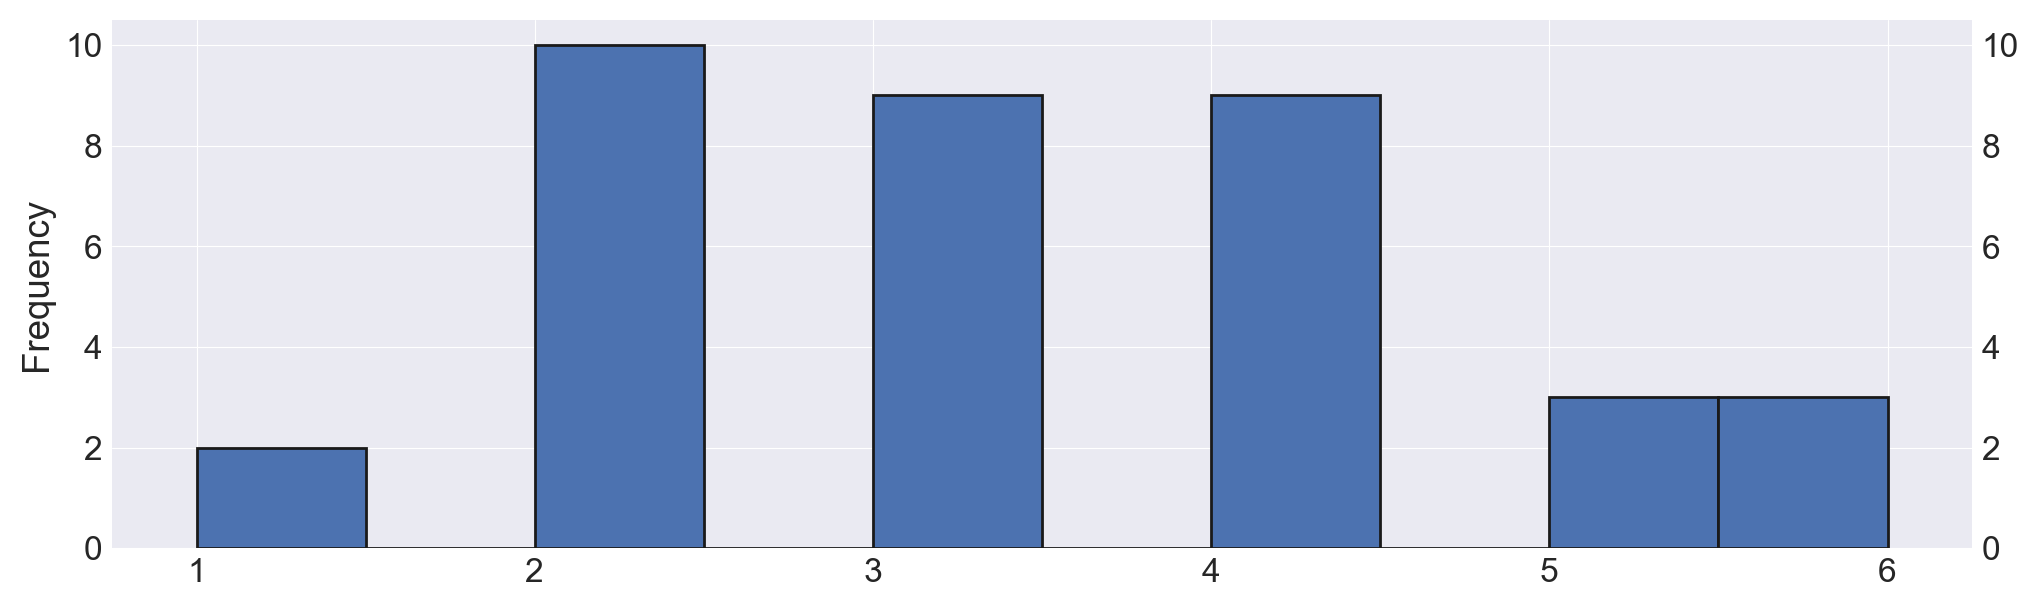

In [8]:
params_combinations = pd.DataFrame([sell_month_best_list, sell_duration_best_list], index=['sell_month', 'sell_duration'], columns=OOS_start.year)
params_combinations
plt.show()
params_combinations.T['sell_duration'].plot(kind='hist')

Initial invested capital = 100.00


AbsRet     ARC      IR      aSD       MD      AMD     MLD    IR**  All Risk   ARCMD  ARCAMD  Num Trades  Out of market
Sell in may and go away   813.0405  6.3338  0.3930  16.1185  48.1143  12.4503  7.1075  0.0517    6.8627  0.1316  0.5087          75           2493
Buy and Hold             2145.9160  9.0251  0.4922  18.3365  56.7754  14.1887  7.1732  0.0782   10.5957  0.1590  0.6361           1              0

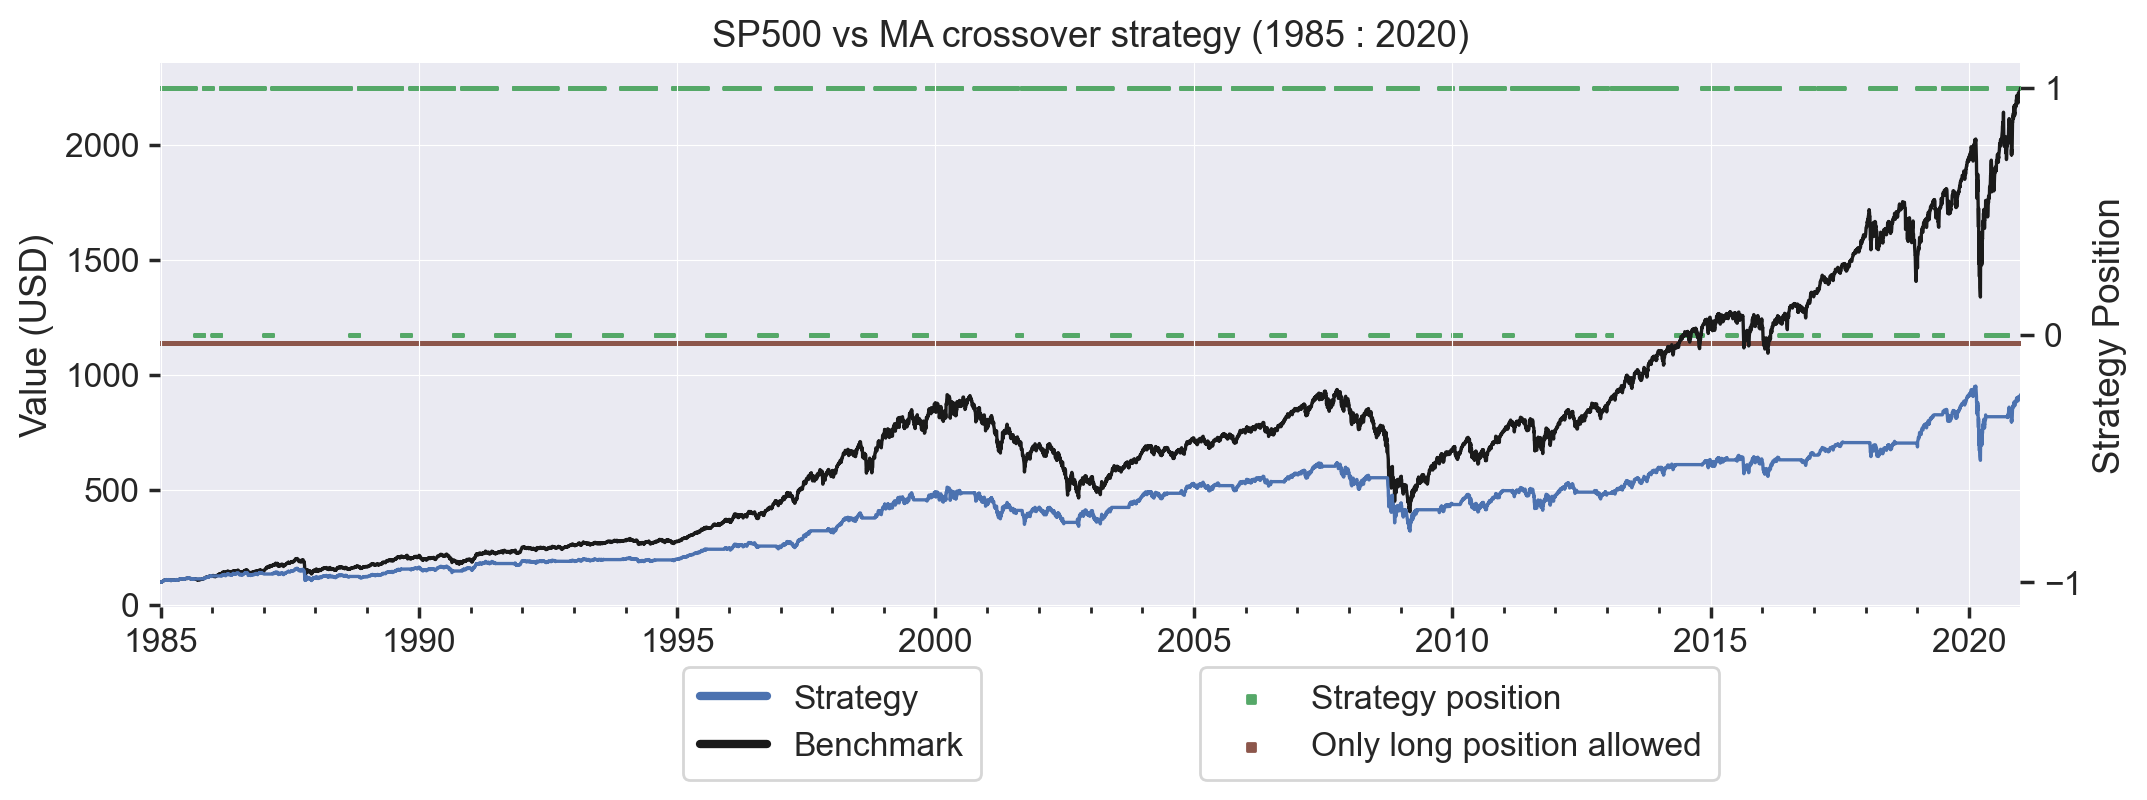

In [9]:
%run Functions.ipynb
#ini_mon = df_wf[str(OOS_start[0].year-1)].iloc[-1]['Close']
ini_mon = 100
print("Initial invested capital = {:.2f}".format(ini_mon))

results_df = prepare_oos_df(df_wf.loc[OOS_start[0]:OOS_end[-1]].copy(), ini_equity=ini_mon)
#results_df = prepare_oos_df(df_wf.loc['2000':].copy(), ini_equity=ini_mon)

metrics = calculate_performance_metrics(results_df, strat_name='Sell in may and go away')
metrics

show_oos_plot(results_df, with_legend=True)

### Heatmaps with widgets

In [10]:
# %run Functions.ipynb
# from ipywidgets import widgets

# options = [year for year in IS_start.year]

# selection_slider = widgets.SelectionSlider(
#     options=options,
#     description='Starting IS year',
#     orientation='horizontal',
#     layout={'width': '900px'},
# )
# selection_slider

# def plot_heatmap(year):
#     index = year - IS_start.year[0]
#     show_both_heatmaps_new(robust_ir_list[index], weights_list[index], market_ir_list[index], 
#                            plot_title=str(year), left_plot_title="Robust IR", right_plot_title="weights",
#                            x_title="Sell duration", x_values=sell_duration_list, y_title="Sell month", y_values=sell_month_list)   

# widgets.interact(
#     plot_heatmap,
#     year=selection_slider
# );

In [11]:
%run Functions.ipynb
from ipywidgets import widgets

options = [year for year in IS_start.year]

selection_slider = widgets.SelectionSlider(
    options=options,
    description='Starting IS year',
    orientation='horizontal',
    layout={'width': '900px'},
)
#selection_slider

def plot_heatmap(year):
    index = year - IS_start.year[0]
    print(sell_month_best_list[index], sell_duration_best_list[index])
#     show_both_heatmaps(weights_list[index], 100*cummulated_weights_list[index], market_ir_list[index], 
#                            plot_title=str(year), left_plot_title="weights", right_plot_title="Cummulative weights",
#                            x_title="Sell duration", x_values=sell_duration_list, y_title="Sell month", y_values=sell_month_list)
    
    print(f'Market IR: {market_ir_list[index]}')
    show_both_heatmaps(indiv_ir_list[index], 100*cummulated_weights_list[index], market_ir_list[index], 
                           plot_title=f'{IS_start[index].year}:{IS_end[index].year}', left_plot_title="Individual IR", right_plot_title="Cummulative weights (%)",
                           x_title="Sell duration", x_values=sell_duration_list, y_title="Sell month", y_values=sell_month_list)
widgets.interact(
    plot_heatmap,
    year=selection_slider
);

interactive(children=(SelectionSlider(description='Starting IS year', layout=Layout(width='900px'), options=(1…

## See OOS performance

Initial invested capital = 100.00


AbsRet     ARC      IR      aSD       MD      AMD     MLD    IR**  All Risk   ARCMD  ARCAMD  Num Trades  Out of market
Sell in may and go away   813.0405  6.3338  0.3930  16.1185  48.1143  12.4503  7.1075  0.0517    6.8627  0.1316  0.5087          75           2493
Buy and Hold             2145.9160  9.0251  0.4922  18.3365  56.7754  14.1887  7.1732  0.0782   10.5957  0.1590  0.6361           1              0

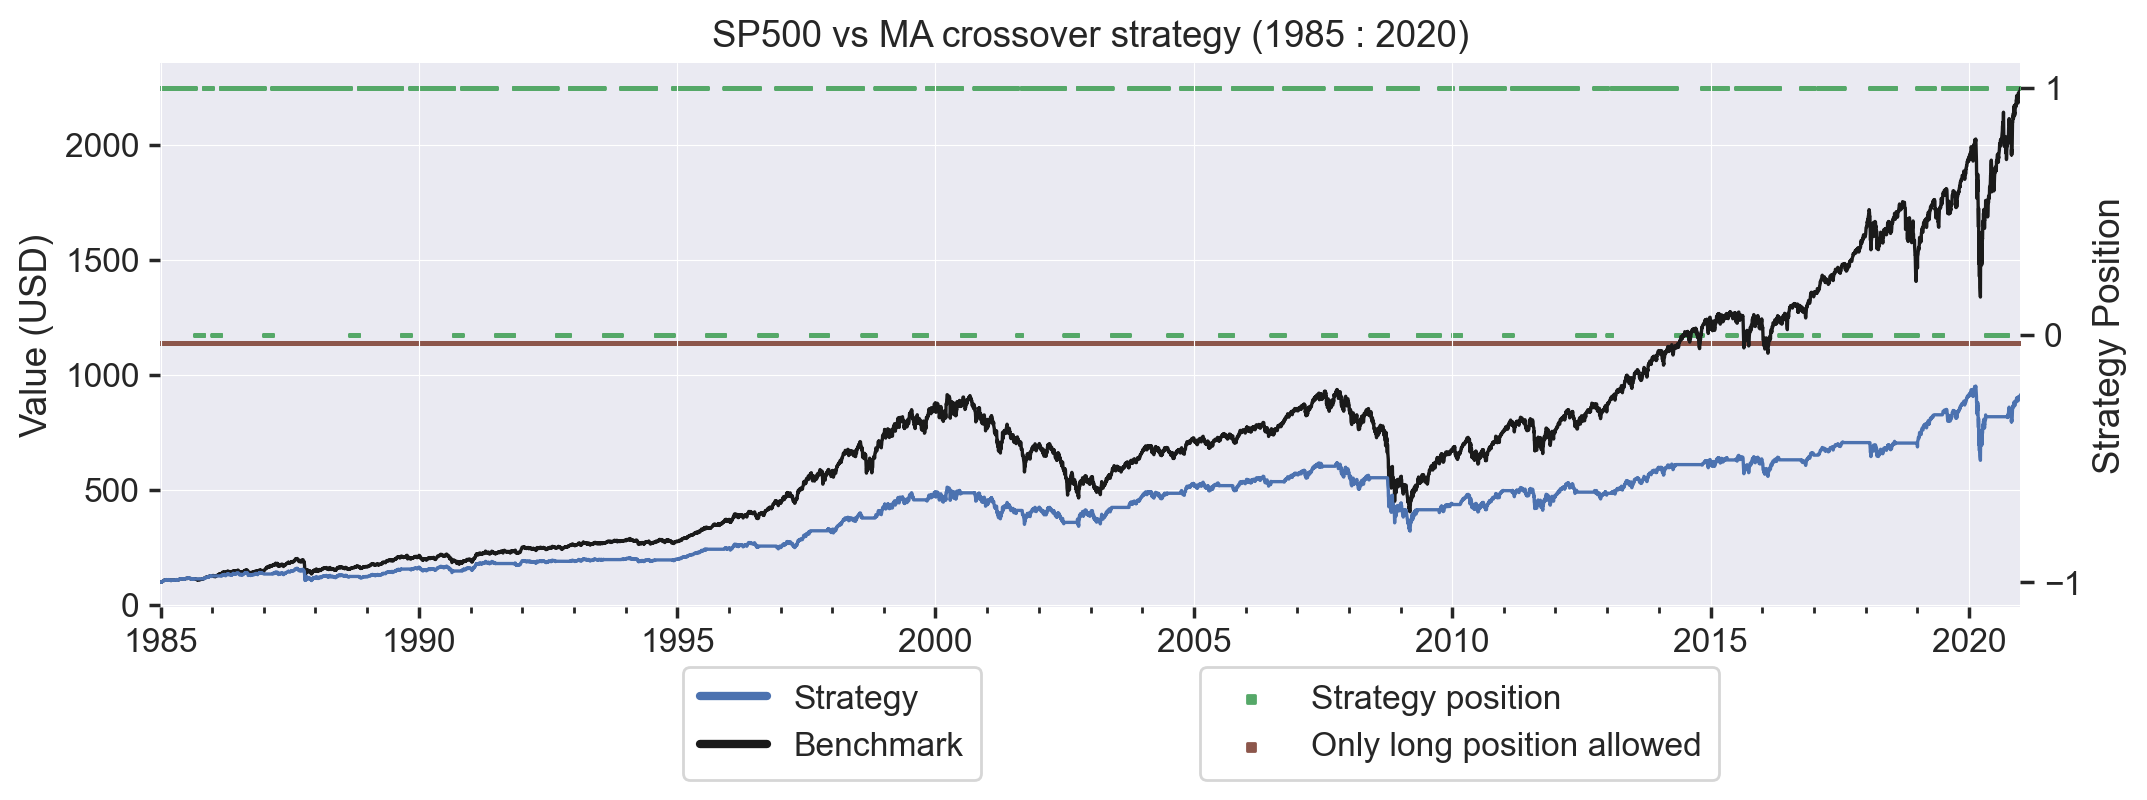

In [12]:
%run Functions.ipynb
#ini_mon = df_wf[str(OOS_start[0].year-1)].iloc[-1]['Close']
ini_mon = 100
print("Initial invested capital = {:.2f}".format(ini_mon))

results_df = prepare_oos_df(df_wf.loc[OOS_start[0]:OOS_end[-1]].copy(), ini_equity=ini_mon)
#results_df = prepare_oos_df(df_wf.loc['2000':].copy(), ini_equity=ini_mon)

metrics = calculate_performance_metrics(results_df, strat_name='Sell in may and go away')
metrics

show_oos_plot(results_df, with_legend=True)

<AxesSubplot:xlabel='Date'>

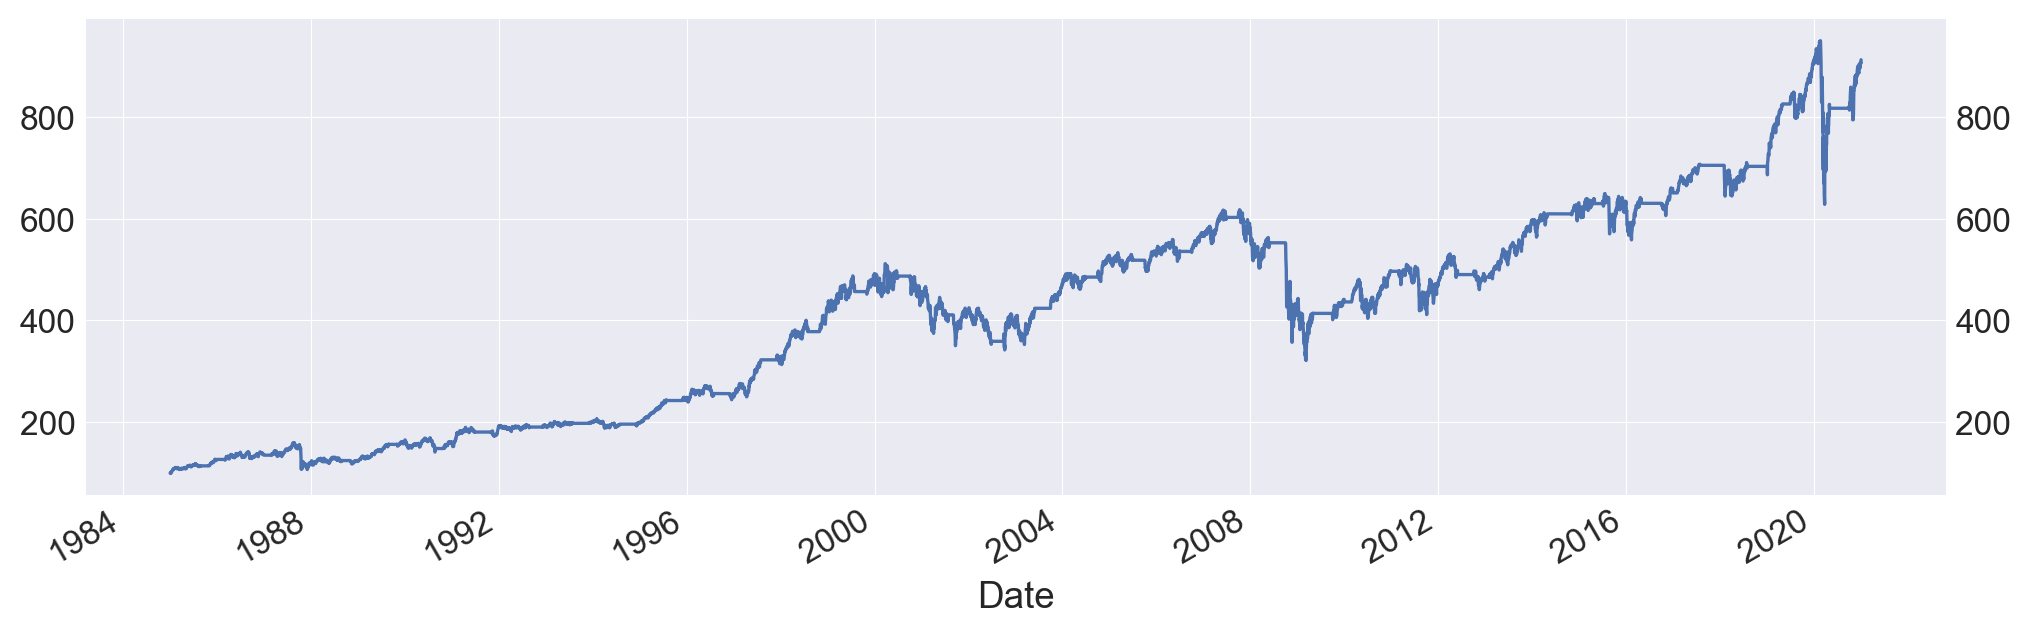

<AxesSubplot:xlabel='Date'>

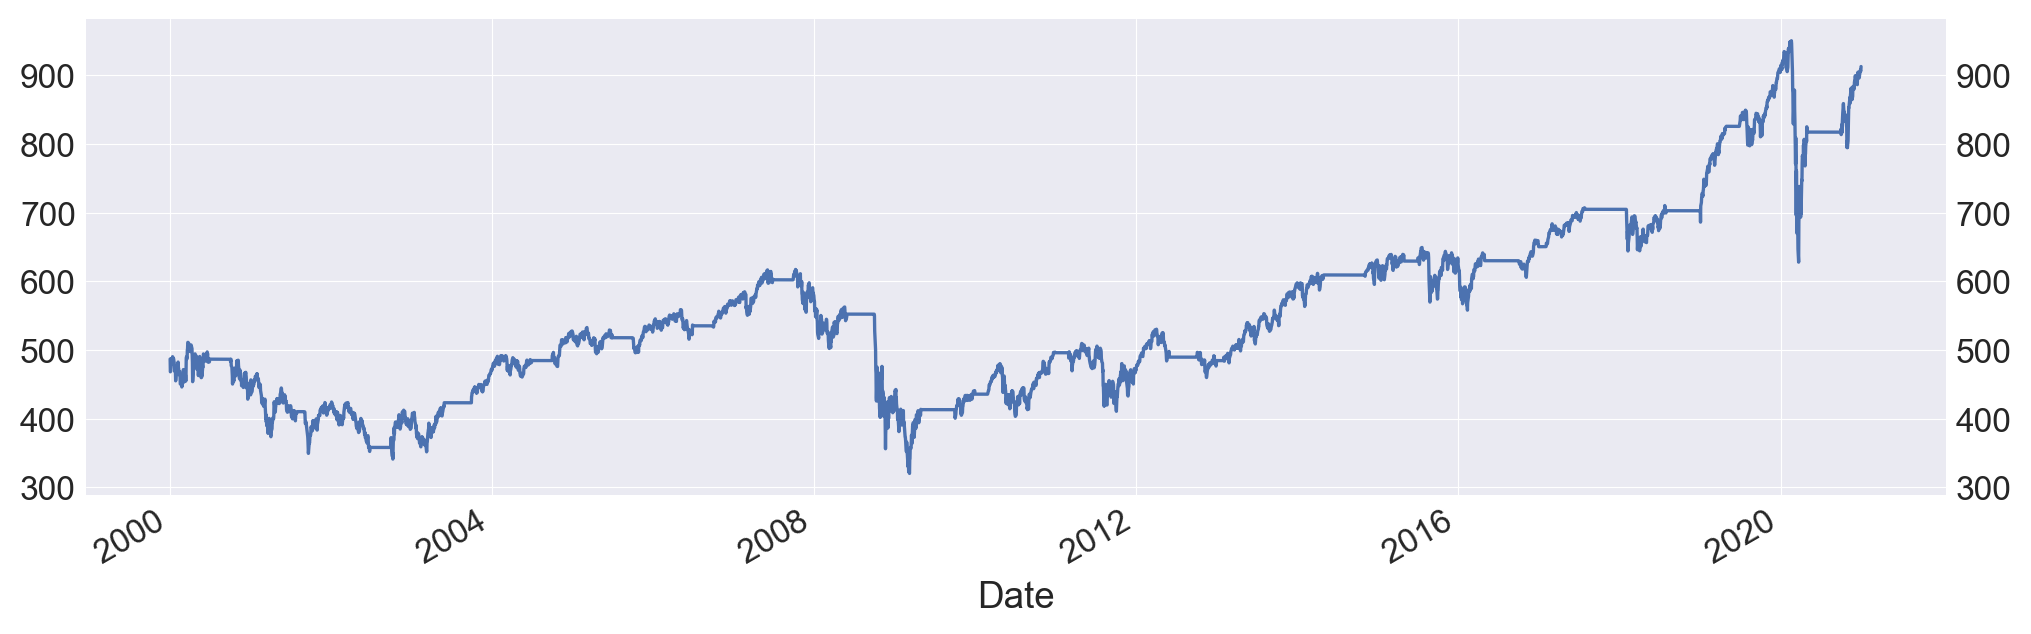

In [13]:
results_df['Strat_cum_ret'].plot()
plt.show()
results_df['2000':]['Strat_cum_ret'].plot()

In [29]:
grouped.groupby(results_df.index.month).get_group(2)['2007-02-25':'2008']

Date
2007-02-26    116.864661
2007-02-27    112.806489
2007-02-28    113.433793
2008-02-01    114.821938
2008-02-04    113.620571
2008-02-05    109.985232
2008-02-06    109.146744
2008-02-07    110.007450
2008-02-08    109.545010
2008-02-11    110.190120
2008-02-12    110.990750
2008-02-13    112.500676
2008-02-14    110.990750
2008-02-15    111.083733
2008-02-19    110.984171
2008-02-20    111.909876
2008-02-21    110.469891
2008-02-22    111.340461
2008-02-25    112.878370
2008-02-26    113.659253
2008-02-27    113.554749
2008-02-28    112.539357
2008-02-29    109.490699
Name: Market_daily_ret, dtype: float64

Date                   4       11      12      5       7       1       3      10      2       6      8      9 
Cummulated_Return  183.88  173.17  171.93  151.91  147.21  146.17  134.78  121.3  112.11  105.15  85.74  75.95

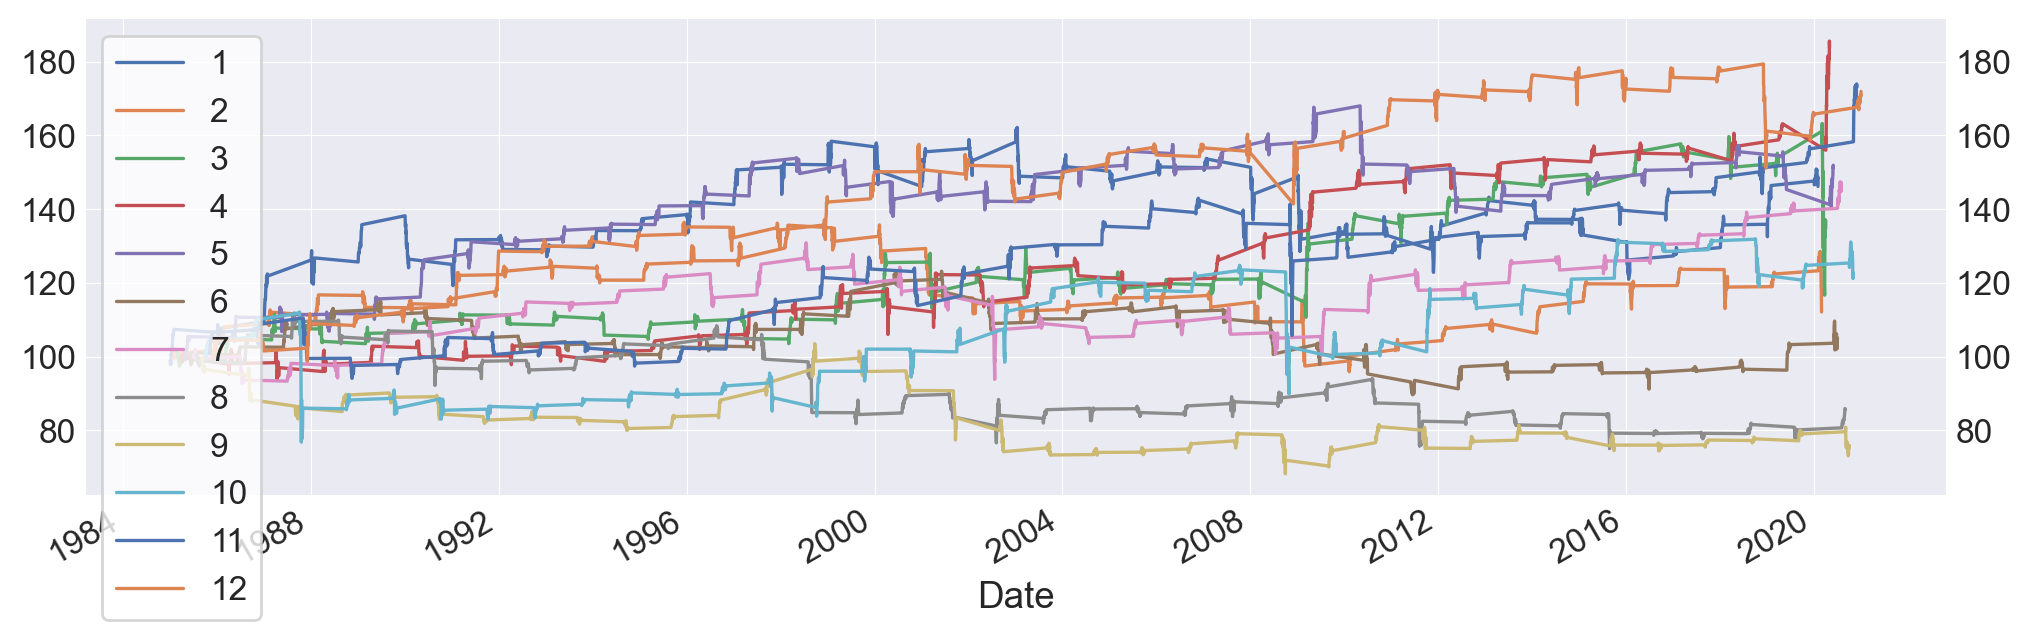

In [19]:
def _cummulated_ret(serie):
    return serie.add(1).cumprod().mul(100)
def get_last(serie):
    return serie.iloc[-1]

grouped = results_df['Market_daily_ret'].groupby(results_df.index.month).apply(_cummulated_ret)

cum_ret_df = grouped.groupby(results_df.index.month).apply(get_last).to_frame().T.rename({'Market_daily_ret':'Cummulated_Return'}).round(2)

profitability = list(cum_ret_df.sort_values(by='Cummulated_Return', axis=1, ascending=False).columns)
cum_ret_df[profitability]

fig, ax = plt.subplots()
_ = grouped.groupby(results_df.index.month).plot(ax=ax)
_ = ax.legend(loc='upper left')

## Let´s see the performance of the best possible combination (ex-post)

Strategy: sell_in_may_and_go_away(short from June - long from October)
Period: 1985-01-02 to 2020-12-31
	Overall return of SP500: +2145.92 %. IR of SP500: 0.49
	Overall return of strategy: +2109.98 %. IR strategy: 0.57


AbsRet     ARC      IR      aSD       MD      AMD     MLD    IR**  All Risk   ARCMD  ARCAMD  Num Trades  Out of market
sell_in_may_and_go_away  2109.9829  8.9762  0.5749  15.6141  48.1143  11.5587  4.2930  0.1072    3.7278  0.1866  0.7766          73           3058
Buy and Hold             2145.9160  9.0251  0.4922  18.3365  56.7754  14.1887  7.1732  0.0782   10.5957  0.1590  0.6361           1              0

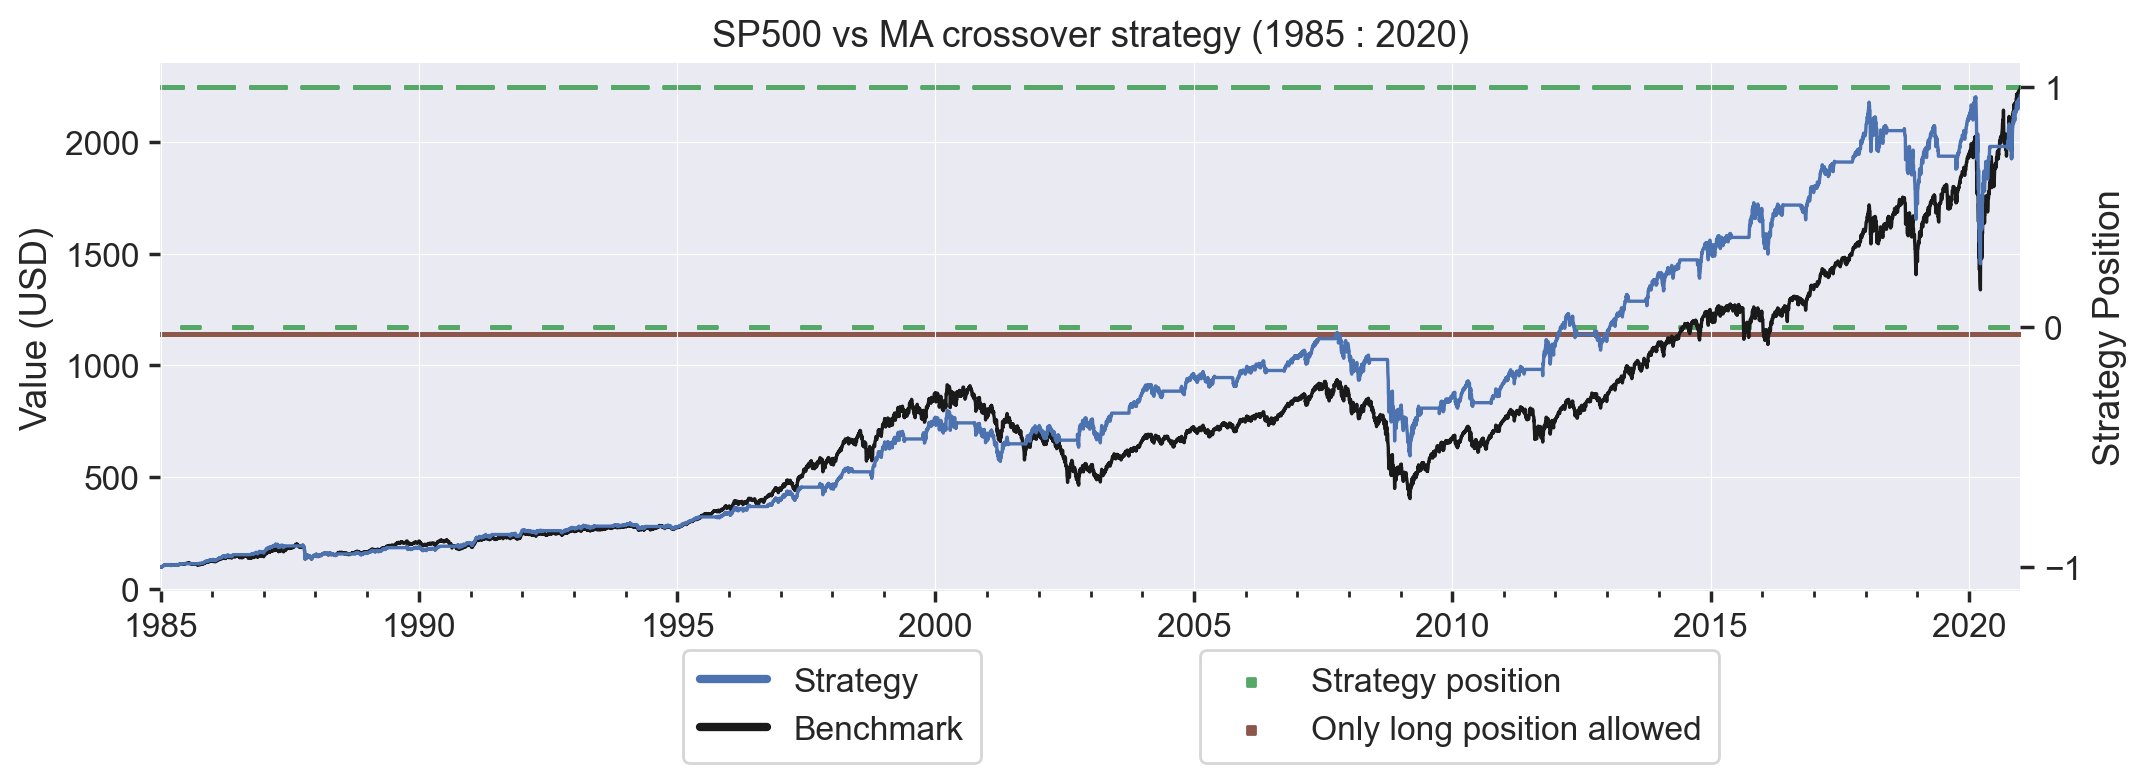

In [36]:
%run Functions.ipynb
df = data['1985':].copy() # Since 1950
sell_month = 6 # 6 to sell in June
sell_duration = 4 # 4 to sell for 4 months (May, June, July, August)
strategy = sell_in_may_and_go_away(df, sell_month, sell_duration)
df = backtest_print_plot(df, strategy, strat_name='sell_in_may_and_go_away', strat_params=(sell_month, sell_duration), with_legend=True)

metrics = calculate_performance_metrics(df, strat_name='sell_in_may_and_go_away')
metrics

Strategy: sell_in_may_and_go_away(short from May - long from November)
Period: 1985-01-02 to 2020-12-31
	Overall return of SP500: +2145.92 %. IR of SP500: 0.49
	Overall return of strategy: +1099.31 %. IR strategy: 0.56


AbsRet     ARC      IR      aSD       MD      AMD     MLD    IR**  All Risk   ARCMD  ARCAMD  Num Trades  Out of market
sell_in_may_and_go_away  1099.311  7.1422  0.5598  12.7578  38.1198   9.7617  5.7796  0.1049    2.7438  0.1874  0.7317          73           4617
Buy and Hold             2145.916  9.0251  0.4922  18.3365  56.7754  14.1887  7.1732  0.0782   10.5957  0.1590  0.6361           1              0

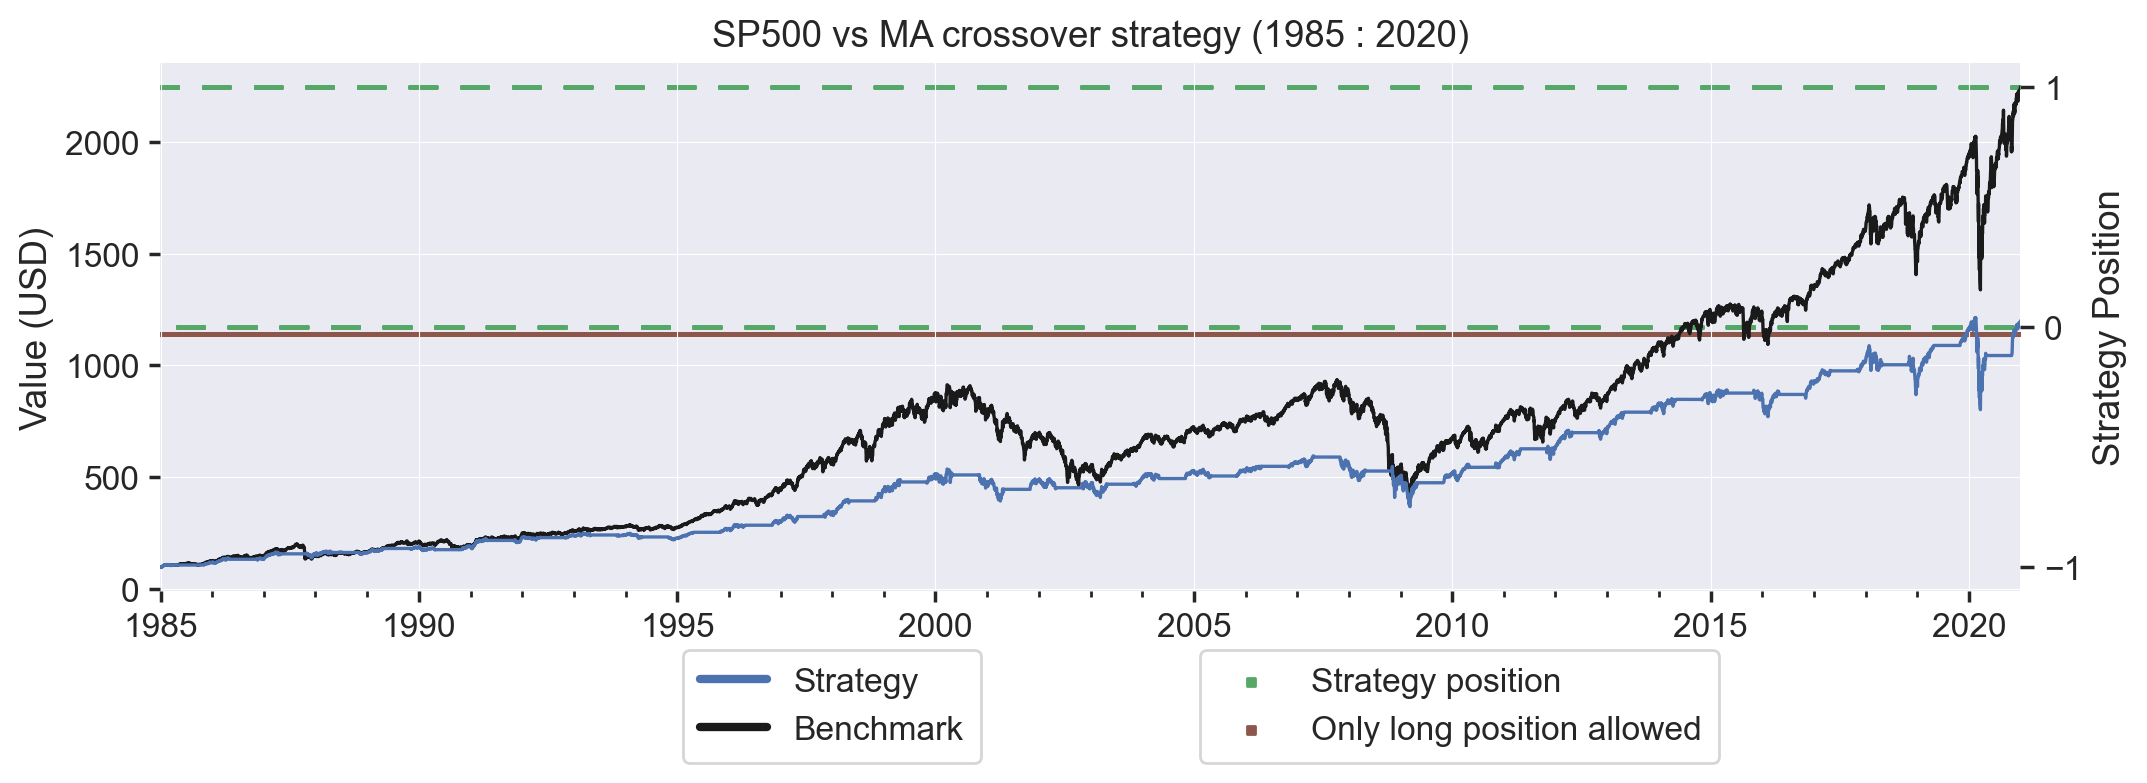

In [35]:
%run Functions.ipynb
df = data['1985':].copy() # Since 1950
sell_month = 5 # 5 to sell in May
sell_duration = 6 # 4 to sell for 4 months (May, June, July, August)
strategy = sell_in_may_and_go_away(df, sell_month, sell_duration)
df = backtest_print_plot(df, strategy, strat_name='sell_in_may_and_go_away', strat_params=(sell_month, sell_duration), with_legend=True)

metrics = calculate_performance_metrics(df, strat_name='sell_in_may_and_go_away')
metrics